<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/Argentina%20Stock%20Index%20-%20Merval%20-%20IN%20USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import datetime as dt
import pandas_datareader as wb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
indice_bursatil = pd.read_csv("indices-bursatiles-argentina-indices-cotizaciones.csv", delimiter=",")

#indice_bursatil was extracted from datos.gob.ar 
#for more info: https://datos.gob.ar/dataset/sspm-indices-bursatiles-argentina


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Índice MERVAL: Índice Bursátil Argentina


> Bloque con sangría



In [ ]:
indice_bursatil.head()

,indice_tiempo,bolsa_g,burcap,merval,merval_arg,merval_25
0,2004-10-04,51553.00,2881.26,1167.09,1085.43,1151.0
1,2004-10-05,50346.26,2830.79,1135.37,1054.10,1151.0
2,2004-10-06,50553.64,2852.15,1128.00,1046.48,1113.0
3,2004-10-07,50978.02,2868.16,1140.26,1059.00,1126.0
4,2004-10-08,50763.08,2853.87,1128.74,1048.06,1115.0


In [ ]:
indice_bursatil.describe()

,bolsa_g,burcap,merval,merval_arg,merval_25
count,3.904000e+03,3545.000000,3904.000000,3904.000000,3545.000000
mean,4.668402e+05,23504.097836,10449.357351,9417.586004,8372.645368
std,5.093040e+05,26233.515235,12057.938642,11110.245265,10149.826091
min,5.034626e+04,2814.380000,828.990000,591.870000,828.940000
25%,1.115118e+05,7172.360000,2076.897500,1513.107500,2003.120000
50%,1.828902e+05,9533.550000,3307.000000,2464.500000,2825.800000
75%,6.810196e+05,32254.870000,15836.047500,14760.732500,11622.540000
max,2.095585e+06,109493.300000,49449.860000,39634.670000,41313.960000


In [ ]:
merval = indice_bursatil[["indice_tiempo","merval"]]
#Argentinian stock index, measured in ARS (Argentinian pesos)

In [ ]:
merval.tail(10)

,indice_tiempo,merval
5770,2020-07-22,48634.09
5771,2020-07-23,48408.27
5772,2020-07-24,48605.06
5773,2020-07-25,NaN
5774,2020-07-26,NaN
5775,2020-07-27,49449.86
5776,2020-07-28,48934.44
5777,2020-07-29,48884.46
5778,2020-07-30,49405.75
5779,2020-07-31,49253.62


In [ ]:
merval.indice_tiempo = pd.to_datetime(merval.indice_tiempo) #### indicar que columna queremos transformar #####
merval['year'] = merval.indice_tiempo.dt.year #creamos una nueva columna "year" con .dt.year sobre la col "indice_tiempo"
merval["month"] = merval.indice_tiempo.dt.month
merval.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,indice_tiempo,merval,year,month
0,2004-10-04,1167.09,2004,10
1,2004-10-05,1135.37,2004,10
2,2004-10-06,1128.00,2004,10
3,2004-10-07,1140.26,2004,10
4,2004-10-08,1128.74,2004,10


In [ ]:
merval_by_year = merval.groupby(["year"])["merval"].mean()
merval_by_year.head(18)

year
2004     1248.644375
2005     1492.634127
2006     1743.976048
2007     2155.937581
2008     1771.014597
2009     1628.339918
2010     2543.173984
2011     3106.676082
2012     2490.404357
2013     3979.724609
2014     8088.324091
2015    11061.224835
2016    14468.665976
2017    22694.177571
2018    30355.156132
2019    34402.599246
2020    37724.875855
Name: merval, dtype: float64

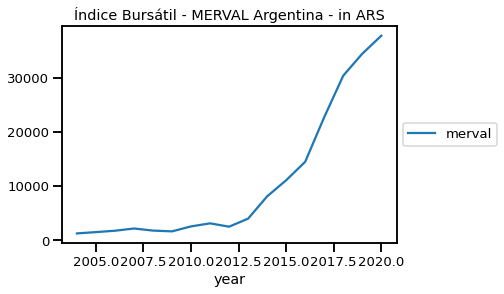

In [ ]:
ax = sns.set_context("talk", font_scale=0.8)
merval_by_year.plot(title = "Índice Bursátil - MERVAL Argentina - in ARS" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[]

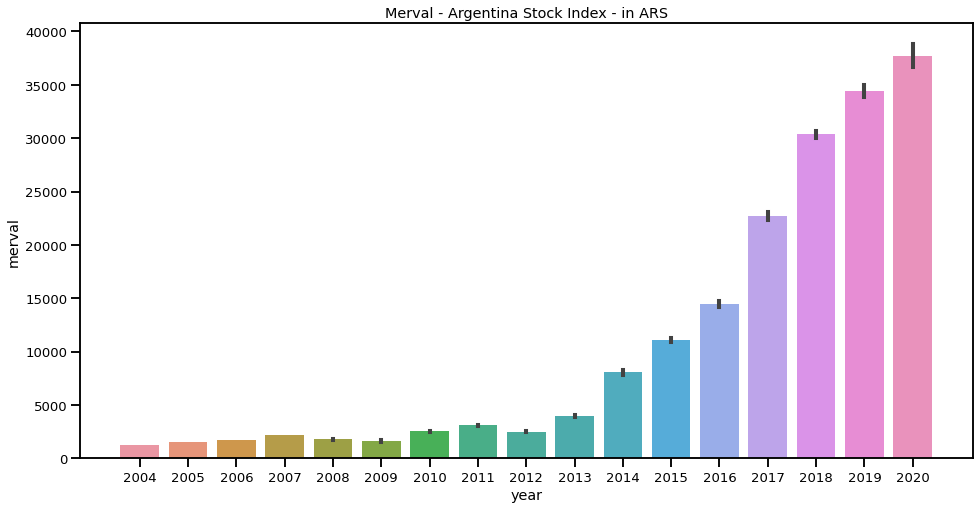

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x = "year", y = "merval", ax=ax, data=merval)
plt.title("Merval - Argentina Stock Index - in ARS")
plt.plot()

Dólar CCL - FX: USD to ARS Exchange Rate 

 Esta operatoria financiera también conocida como contado con liquidez, CCL o contado con liqui, se realiza a través de la bolsa local, y es una alternativa para que las grandes empresas puedan hacerse de dólares americanos. Es una medida más realista del valor del dólar libre.

This financial operation, also known as cash with liquidity, CCL, is carried out through the local stock exchange, and is an alternative for big companies to obtain US dollars. It is a more realistic measure of the value of the free dollar.

In [ ]:
tickers=["GGAL", "GGAL.BA"]
CCL_data = pd.DataFrame()
for t in tickers:
    CCL_data[t]= wb.DataReader(t, data_source="yahoo", start="01-01-2003")[("Adj Close")]

In [ ]:
CCL_data

,GGAL,GGAL.BA
Date,,
2003-01-02,1.952801,0.666931
2003-01-03,2.076637,0.702539
2003-01-06,2.400516,0.765094
2003-01-07,2.381465,0.765094
2003-01-08,2.381465,0.784342
...,...,...
2020-09-21,7.600000,105.699997
2020-09-22,7.250000,104.449997
2020-09-23,6.860000,103.199997


In [ ]:
GGAL_CCL = CCL_data.dropna()


In [ ]:
GGAL_CCL.describe()

,GGAL,GGAL.BA
count,4261.000000,4261.000000
mean,14.026634,27.109764
std,13.218953,40.675900
min,1.389264,0.550483
25%,5.667885,2.107617
50%,8.125557,3.524767
75%,17.230000,39.750168
max,71.444939,174.550003


In [ ]:
GGAL_CCL["Dólar CCL"] = ((GGAL_CCL["GGAL.BA"]*10)/(GGAL_CCL["GGAL"]))
GGAL_CCL

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,GGAL,GGAL.BA,Dólar CCL
Date,,,
2003-01-02,1.952801,0.666931,3.415254
2003-01-03,2.076637,0.702539,3.383061
2003-01-06,2.400516,0.765094,3.187206
2003-01-07,2.381465,0.765094,3.212703
2003-01-08,2.381465,0.784342,3.293526
...,...,...,...
2020-09-21,7.600000,105.699997,139.078945
2020-09-22,7.250000,104.449997,144.068961
2020-09-23,6.860000,103.199997,150.437310


In [ ]:
GGAL_CCL["Dólar CCL"].describe()

count    4261.000000
mean       14.574563
std        23.364835
min         2.667486
25%         3.111753
50%         4.613799
75%        14.568177
max       150.437310
Name: Dólar CCL, dtype: float64

In [ ]:
GGAL_CCL.columns

Index(['GGAL', 'GGAL.BA', 'Dólar CCL'], dtype='object')

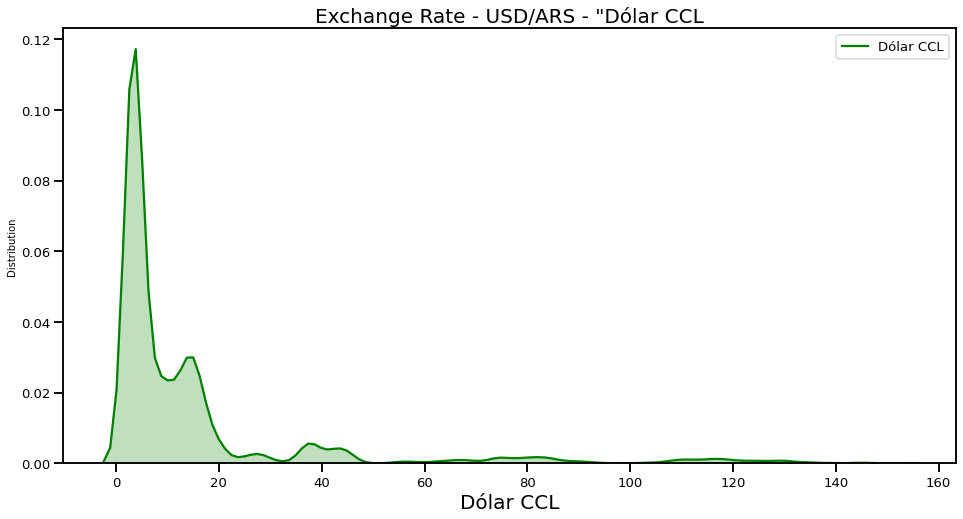

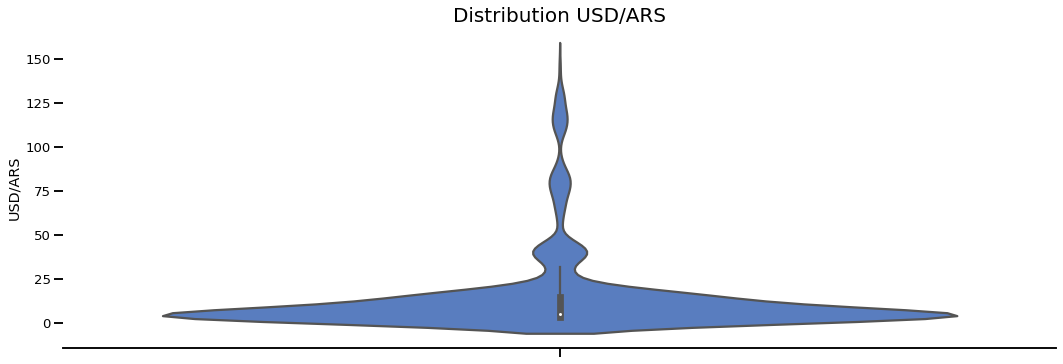

In [ ]:
plt.figure(figsize=(16,8))
sns.kdeplot(GGAL_CCL['Dólar CCL'], color= "Green", shade = True)
plt.xlabel("Dólar CCL",size = 20)
plt.ylabel("Distribution",size = 10)
plt.title('Exchange Rate - USD/ARS - "Dólar CCL',size = 20)
#plt.imsave('KDE',format='png') # Guardar la imagen
plt.show()

g = sns.catplot(y="Dólar CCL",
                data=GGAL_CCL, 
                kind="violin", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("USD/ARS")
plt.title('Distribution USD/ARS',size = 20)
plt.show()



[]

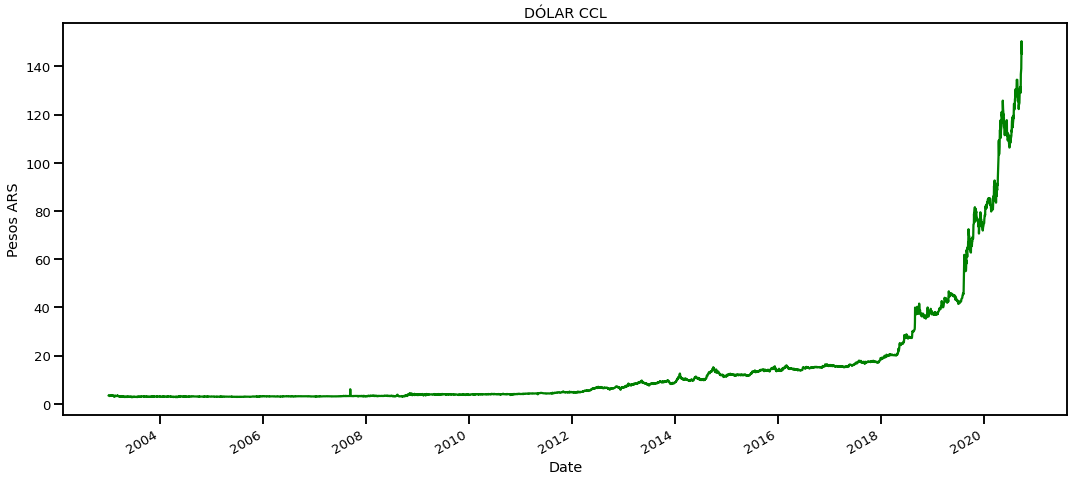

In [ ]:
GGAL_CCL["Dólar CCL"].plot(figsize=(18,8), color="g")
plt.title("DÓLAR CCL")
plt.ylabel("Pesos ARS")
plt.plot(label="Fecha")

Most of the time, the monetary exchange rate was in the range of [10-25] ARS per US dollar. Due to the fact that the great leap occurred last year, values that emerged from the set are shown.

La mayor parte del tiempo, el tipo de cambio monetario se encontró en la franja de [10-25] ARS por Dólar amerícano. Debido a que el gran salto se dio el último año se muestran valores que se desprendieron del conjunto.

In [ ]:
merval.shape

(5780, 4)

In [ ]:
GGAL_CCL.index 

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', name='Date', length=4261, freq=None)

In [ ]:
GGAL_CCL["indice_tiempo"]=GGAL_CCL.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
GGAL_CCL

,GGAL,GGAL.BA,Dólar CCL,indice_tiempo
Date,,,,
2003-01-02,1.952801,0.666931,3.415254,2003-01-02
2003-01-03,2.076637,0.702539,3.383061,2003-01-03
2003-01-06,2.400516,0.765094,3.187206,2003-01-06
2003-01-07,2.381465,0.765094,3.212703,2003-01-07
2003-01-08,2.381465,0.784342,3.293526,2003-01-08
...,...,...,...,...
2020-09-21,7.600000,105.699997,139.078945,2020-09-21
2020-09-22,7.250000,104.449997,144.068961,2020-09-22
2020-09-23,6.860000,103.199997,150.437310,2020-09-23


In [ ]:
GGAL_CCL.indice_tiempo = pd.to_datetime(GGAL_CCL.indice_tiempo) #### indicar que columna queremos transformar #####
GGAL_CCL['year'] = GGAL_CCL.indice_tiempo.dt.year #creamos una nueva columna "year" con .dt.year sobre la col "indice_tiempo"
mask = GGAL_CCL["year"]>2003
GGAL_CCL = GGAL_CCL[mask]
GGAL_CCL

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GGAL,GGAL.BA,Dólar CCL,indice_tiempo,year
Date,,,,,
2004-01-02,6.753832,2.021003,2.992379,2004-01-02,2004
2004-01-05,7.030083,2.021003,2.874792,2004-01-05,2004
2004-01-06,7.106289,2.069122,2.911677,2004-01-06,2004
2004-01-07,7.096763,2.059498,2.902025,2004-01-07,2004
2004-01-08,6.963401,2.059498,2.957604,2004-01-08,2004
...,...,...,...,...,...
2020-09-21,7.600000,105.699997,139.078945,2020-09-21,2020
2020-09-22,7.250000,104.449997,144.068961,2020-09-22,2020
2020-09-23,6.860000,103.199997,150.437310,2020-09-23,2020


In [ ]:
GGAL_CCL.shape

(4009, 5)

In [ ]:
merval_usd = merval.merge(GGAL_CCL, on="indice_tiempo", how="inner")
merval_usd = merval_usd[["indice_tiempo","merval", "GGAL", "Dólar CCL"]]
merval_usd["Merval_USD"] = merval_usd["merval"]/merval_usd["Dólar CCL"]
merval_usd

,indice_tiempo,merval,GGAL,Dólar CCL,Merval_USD
0,2004-10-04,1167.09,6.591819,2.978328,391.860814
1,2004-10-05,1135.37,6.246899,3.034935,374.100277
2,2004-10-06,1128.00,6.371454,2.930292,384.944613
3,2004-10-07,1140.26,6.333129,3.008808,378.973982
4,2004-10-08,1128.74,6.285224,2.970494,379.983978
...,...,...,...,...,...
3777,2020-07-27,49449.86,12.770000,118.167571,418.472340
3778,2020-07-28,48934.44,12.220000,119.558104,409.294213
3779,2020-07-29,48884.46,12.320000,118.465910,412.645800
3780,2020-07-30,49405.75,12.120000,121.369643,407.068429


In [ ]:
merval_usd.corr = merval_usd.corr()
merval_usd.corr

,merval,GGAL,Dólar CCL,Merval_USD
merval,1.000000,0.689575,0.826707,0.482602
GGAL,0.689575,1.000000,0.229110,0.926326
Dólar CCL,0.826707,0.229110,1.000000,-0.000730
Merval_USD,0.482602,0.926326,-0.000730,1.000000


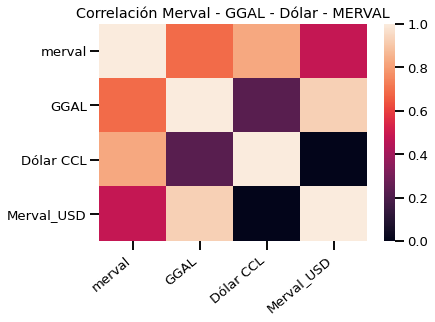

In [ ]:
merval_usd.corr = sns.heatmap(merval_usd.corr, xticklabels=1, yticklabels=1)
merval_usd.corr.set_xticklabels(merval_usd.corr.get_xticklabels(), rotation=40, ha="right")
plt.title("Correlación Merval - GGAL - Dólar - MERVAL")
plt.show()

In [ ]:
merval_usd.dropna()

,indice_tiempo,merval,GGAL,Dólar CCL,Merval_USD
0,2004-10-04,1167.09,6.591819,2.978328,391.860814
1,2004-10-05,1135.37,6.246899,3.034935,374.100277
2,2004-10-06,1128.00,6.371454,2.930292,384.944613
3,2004-10-07,1140.26,6.333129,3.008808,378.973982
4,2004-10-08,1128.74,6.285224,2.970494,379.983978
...,...,...,...,...,...
3777,2020-07-27,49449.86,12.770000,118.167571,418.472340
3778,2020-07-28,48934.44,12.220000,119.558104,409.294213
3779,2020-07-29,48884.46,12.320000,118.465910,412.645800
3780,2020-07-30,49405.75,12.120000,121.369643,407.068429


[]

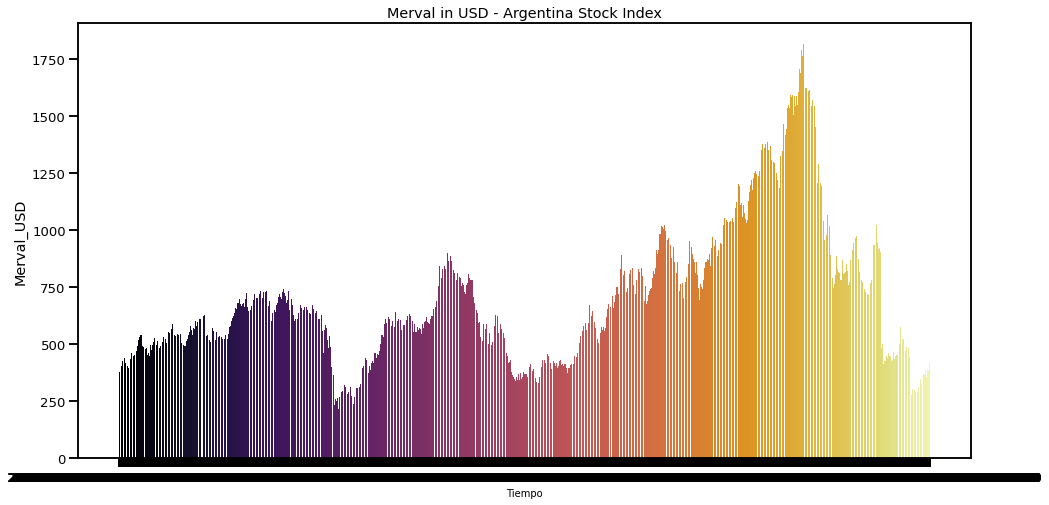

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

x = merval_usd["indice_tiempo"]
y = merval_usd["Merval_USD"]
ax.set_xtickslabels(x)
sns.barplot(x, y, palette="inferno")
ax.set_xlabel("Tiempo", fontsize=10)
plt.title("Merval in USD - Argentina Stock Index")
plt.plot()